# Configuration

In [14]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [52]:
import matplotlib.pyplot as plt
import sqlite3

from mpl_toolkits.basemap import Basemap

# 1. All customers' location showing on world map

In [43]:
plt.figure(figsize=(20,10))

In [44]:
m = Basemap(projection = 'mill')
m.drawcoastlines()

In [45]:
con_db = sqlite3.connect('Data_Challenge.db')
cur = con_db.cursor()
cur.execute('select Longtitude, Latitude from Customers')
locations = cur.fetchall()

In [46]:
for loc in locations:
    xpt, ypt = m(loc[0], loc[1])

    m.plot(xpt, ypt, 'bo', markersize = 5)

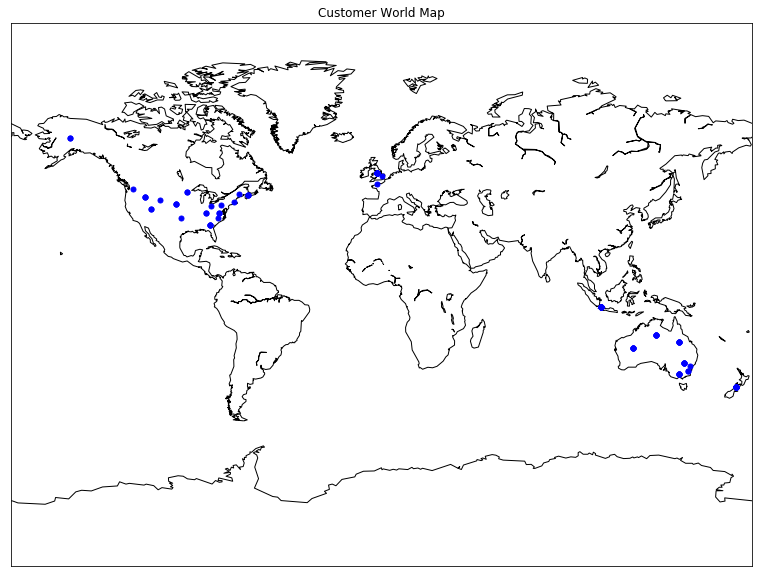

In [47]:
plt.title('Customer World Map')
plt.show()

###  Conclusion: we can find out that all our customers are spreading on north America, East Europe, South East Asia and Ocenia.

# 2. Sales performance in 2013 (amount)

In [62]:
con_db = sqlite3.connect('Data_Challenge.db')
cur = con_db.cursor()

extra_query = 'select P.Product_Category, SUM(S.Invoice_Amount) from Products as P, Sales as S where P.Product_Code = S.Product_Code and S.Year = 2013 group by P.Product_Category order by SUM(S.Invoice_Amount) DESC'
cur.execute(extra_query)
performance = cur.fetchall()

In [63]:
name_list = []
num_list = []

plt.figure(figsize=(20,10))

for i in range(0,len(performance)):
    name_list.append(performance[i][0])
    num_list.append(performance[i][1])

plt.bar(range(len(performance)), num_list, color = 'green',tick_label = name_list)
plt.title('Sales Performance in 2013')

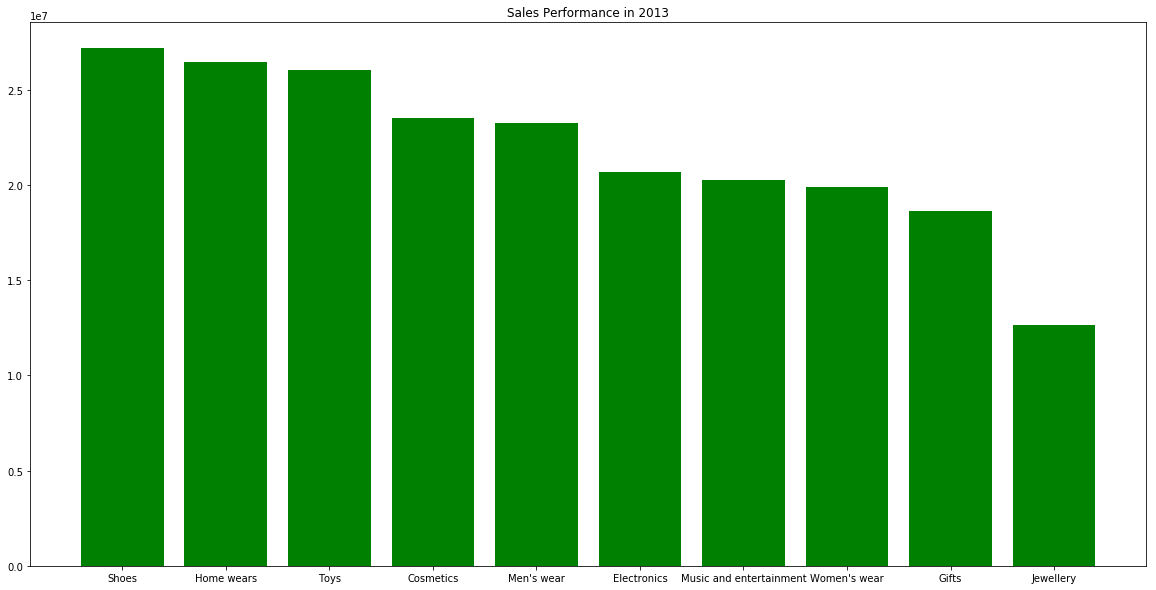

In [64]:
plt.show()

### Conclusion: we can easily find out that best-seller category is shoes, and jewellery is obviously not that popular.

# 3. Sales performance in 2012 (quantity)

In [67]:
con_db = sqlite3.connect('Data_Challenge.db')
cur = con_db.cursor()

extra_query = 'select P.Product_Category, SUM(S.Quantity) from Products as P, Sales as S where P.Product_Code = S.Product_Code and S.Year = 2012 group by P.Product_Category order by SUM(S.Quantity) DESC'
cur.execute(extra_query)
performance = cur.fetchall()

In [68]:
performance

[('Home wears', 119012),
 ('Music and entertainment', 114364),
 ('Toys', 95748),
 ('Shoes', 92796),
 ('Cosmetics', 91268),
 ("Men's wear", 89980),
 ('Gifts', 82540),
 ("Women's wear", 76104),
 ('Electronics', 66360),
 ('Jewellery', 64136)]

In [74]:
name_list = []
num_list = []

plt.figure(figsize=(15,15))

for i in range(0,len(performance)):
    name_list.append(performance[i][0])
    num_list.append(performance[i][1])

# plt.bar(range(len(performance)), num_list, color = 'pink',tick_label = name_list)
# plt.title('Sales Performance in 2012')

slices = [2,1,3,2] #所占百分比
activities = ['sleeping','eating','working','playing']
colors = ['c','m','r','b']

plt.pie(num_list,
       labels=name_list,
       startangle=0,
       shadow=True, #立体感
       explode=(1,0,0,0,0,0,0,0,0,1), #非0部分稍微突出
       autopct='%.0f')

plt.title('Pie for Sales Performance 2012')

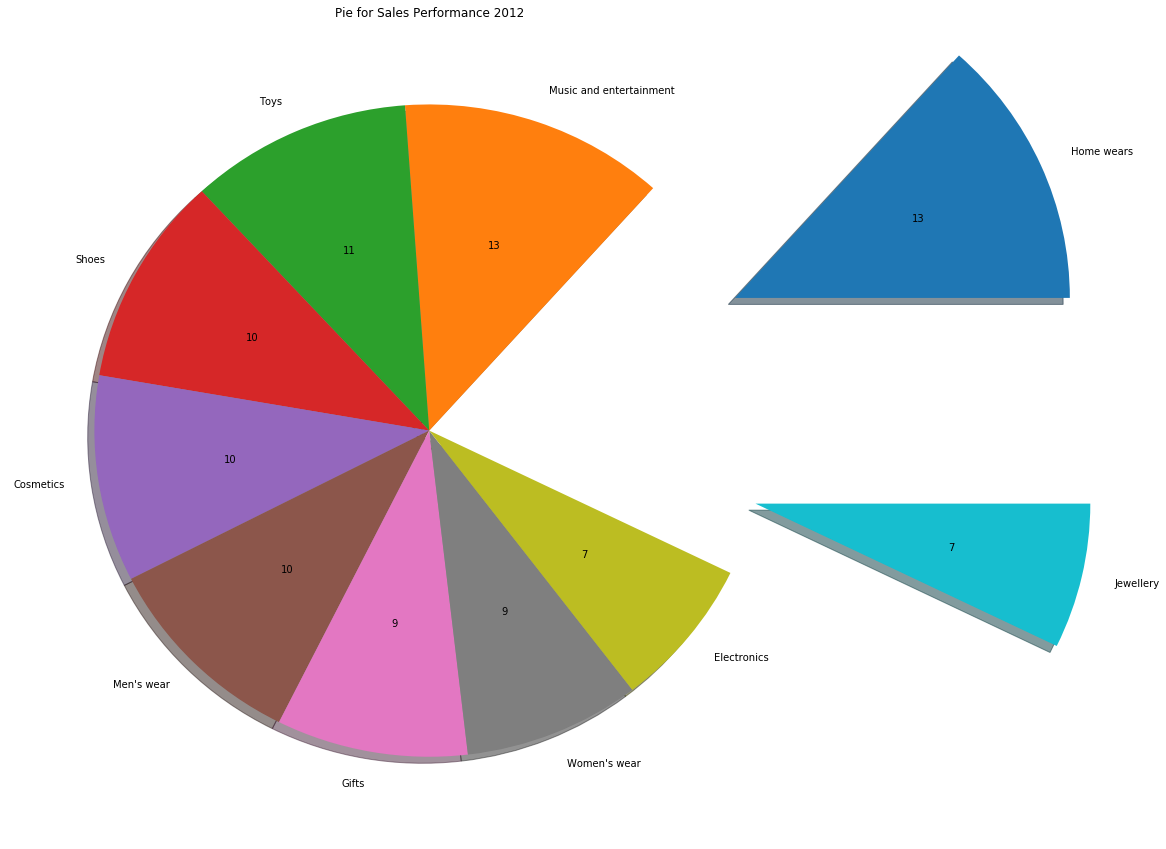

In [75]:
plt.show()

### Conclusion: we can obviously see the sales performance of each category of year 2012

# 4. Sales performance for Jewellery in 2013

In [105]:
con_db = sqlite3.connect('Data_Challenge.db')
cur = con_db.cursor()

extra_query = "select S.Month, SUM(S.Quantity) from Products as P, Sales as S where P.Product_Code = S.Product_Code and S.Year = 2013 and P.Product_Category='Jewellery' group by S.Month order by S.Month"
cur.execute(extra_query)
performance = cur.fetchall()

In [106]:
num_list = []
name_list = []

for p in range(len(performance)):
    num_list.append(performance[p][1])
    name_list.append(performance[p][0])
print(num_list)
print(name_list)

[8584, 1940, 4184, 2004, 3208, 5228, 5208, 5148, 2716, 5012, 6192, 5808]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [109]:
plt.figure(figsize=(10,10))
plt.plot(name_list,num_list,'r')
plt.xticks(name_list,name_list)

([<matplotlib.axis.XTick at 0x1203835c0>,
 <a list of 12 Text xticklabel objects>)

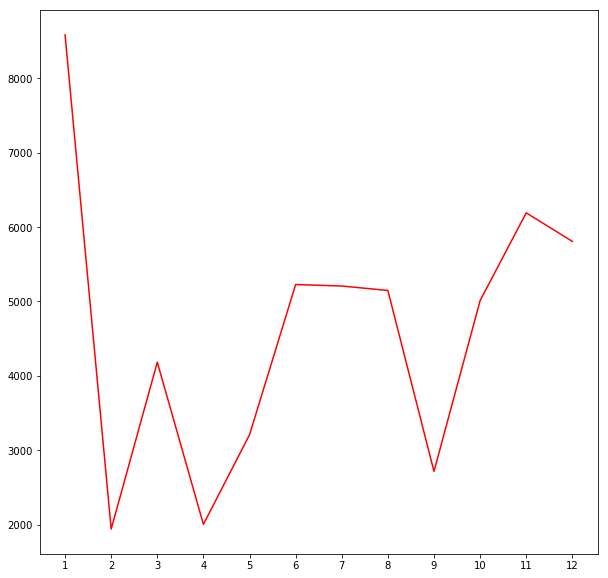

In [110]:
plt.show()

### Conclusion: we can obviously see that sell performance of jewellery is much better on January than other months, because of Christmas?